<b> About Dataset </b>

This dataset is contains 13599 images (10901 Images for Train Data and 2698 images for Test Data) for fresh and rotten fruits in 6 categories

- Fresh Apples
- Fresh Banana
- Fresh Orange
- Rotten Apples
- Rotten Banana
- Rotten Orange

<b> Task: </b> Puropose of this datset is to build a CNN (Convolutional Neural Network) based classification model for these images.

<img src="https://p1.pxfuel.com/preview/453/880/952/orange-rotten-fruit-royalty-free-thumbnail.jpg" height = 80, width = 400>

<b> Importing Libraries </b>

In [8]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

from glob import glob
import os

%matplotlib inline

print("Libraries loaded sucessfully!!!")

Libraries loaded sucessfully!!!


<b>Loading Folder Path</b>

In [42]:
path = "C:\\Users\\lenovo\\Desktop\\Data Science Projects\\Fruits_Classification\\dataset\\train\\*"
folder = glob(path)
folder

['C:\\Users\\lenovo\\Desktop\\Data Science Projects\\Fruits_Classification\\dataset\\train\\freshapples',
 'C:\\Users\\lenovo\\Desktop\\Data Science Projects\\Fruits_Classification\\dataset\\train\\freshbanana',
 'C:\\Users\\lenovo\\Desktop\\Data Science Projects\\Fruits_Classification\\dataset\\train\\freshoranges',
 'C:\\Users\\lenovo\\Desktop\\Data Science Projects\\Fruits_Classification\\dataset\\train\\rottenapples',
 'C:\\Users\\lenovo\\Desktop\\Data Science Projects\\Fruits_Classification\\dataset\\train\\rottenbanana',
 'C:\\Users\\lenovo\\Desktop\\Data Science Projects\\Fruits_Classification\\dataset\\train\\rottenoranges']

<b> Plotting Images </b>

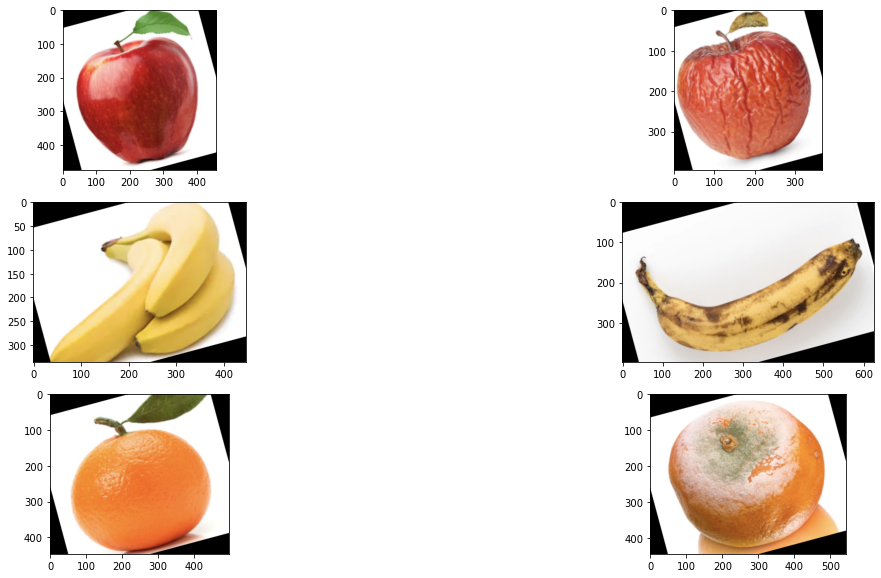

In [21]:
fig = plt.figure(figsize=(20,10))
plt.subplot(3, 2, 1)
ran_img = glob("C:\\Users\\lenovo\\Desktop\\Data Science Projects\\Fruits_Classification\\dataset\\train\\freshapples\\*")
image =[i.split("\\")[9] for i in ran_img]
img_dir = folder[0]
img = plt.imread(os.path.join(img_dir, image[0]))
plt.imshow(img, cmap = 'gray')

plt.subplot(3, 2, 2)
ran_img = glob("C:\\Users\\lenovo\\Desktop\\Data Science Projects\\Fruits_Classification\\dataset\\train\\rottenapples\\*")
image =[i.split("\\")[9] for i in ran_img]
img_dir = folder[3]
img = plt.imread(os.path.join(img_dir, image[0]))
plt.imshow(img, cmap = 'gray')

plt.subplot(3, 2, 3)
ran_img = glob("C:\\Users\\lenovo\\Desktop\\Data Science Projects\\Fruits_Classification\\dataset\\train\\freshbanana\\*")
image =[i.split("\\")[9] for i in ran_img]
img_dir = folder[1]
img = plt.imread(os.path.join(img_dir, image[0]))
plt.imshow(img, cmap = 'gray')

plt.subplot(3, 2, 4)
ran_img = glob("C:\\Users\\lenovo\\Desktop\\Data Science Projects\\Fruits_Classification\\dataset\\train\\rottenbanana\\*")
image =[i.split("\\")[9] for i in ran_img]
img_dir = folder[4]
img = plt.imread(os.path.join(img_dir, image[0]))
plt.imshow(img, cmap = 'gray')

plt.subplot(3, 2, 5)
ran_img = glob("C:\\Users\\lenovo\\Desktop\\Data Science Projects\\Fruits_Classification\\dataset\\train\\freshoranges\\*")
image =[i.split("\\")[9] for i in ran_img]
img_dir = folder[2]
img = plt.imread(os.path.join(img_dir, image[0]))
plt.imshow(img, cmap = 'gray')

plt.subplot(3, 2, 6)
ran_img = glob("C:\\Users\\lenovo\\Desktop\\Data Science Projects\\Fruits_Classification\\dataset\\train\\rottenoranges\\*")
image =[i.split("\\")[9] for i in ran_img]
img_dir = folder[5]
img = plt.imread(os.path.join(img_dir, image[0]))
plt.imshow(img, cmap = 'gray')

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

train_gen = train_datagen.flow_from_directory("C:\\Users\\lenovo\\Desktop\\Data Science Projects\\Fruits_Classification\\dataset\\train\\",
                                             target_size = (150, 150),
                                             class_mode = 'categorical',
                                             batch_size = 126)

test_gen = test_datagen.flow_from_directory("C:\\Users\\lenovo\\Desktop\\Data Science Projects\\Fruits_Classification\\dataset\\test\\",
                                             target_size = (150, 150),
                                             class_mode = 'categorical',
                                             batch_size = 126)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


<b> Building Model </b>

In [24]:
model =tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [27]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [28]:
history = model.fit(train_gen, epochs=25, steps_per_epoch=20, validation_data=test_gen, verbose=1, validation_steps=10)

Epoch 1/25
20/20 [==============================] - 72s 4s/step - loss: 3.3995 - accuracy: 0.2623 - val_loss: 1.6218 - val_accuracy: 0.3262
Epoch 2/25
20/20 [==============================] - 76s 4s/step - loss: 1.4654 - accuracy: 0.4230 - val_loss: 1.0689 - val_accuracy: 0.6119
Epoch 3/25
20/20 [==============================] - 76s 4s/step - loss: 1.1874 - accuracy: 0.5698 - val_loss: 1.0955 - val_accuracy: 0.5516
Epoch 4/25
20/20 [==============================] - 90s 4s/step - loss: 0.9883 - accuracy: 0.6444 - val_loss: 0.8244 - val_accuracy: 0.6786
Epoch 5/25
20/20 [==============================] - 84s 4s/step - loss: 0.8718 - accuracy: 0.6865 - val_loss: 1.1502 - val_accuracy: 0.5595
Epoch 6/25
20/20 [==============================] - 88s 4s/step - loss: 0.7605 - accuracy: 0.7290 - val_loss: 0.5842 - val_accuracy: 0.7913
Epoch 7/25
20/20 [==============================] - 67s 3s/step - loss: 0.7542 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.8429
Epoch 8/25
20/20 [==

<b> Plotting the prediction </b>

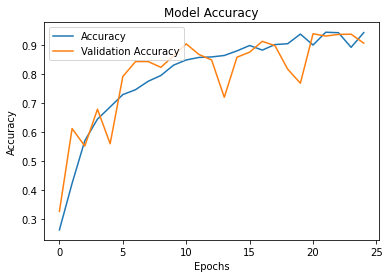

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend(['Accuracy', 'Validation Accuracy'], loc = 'upper left')
plt.show()

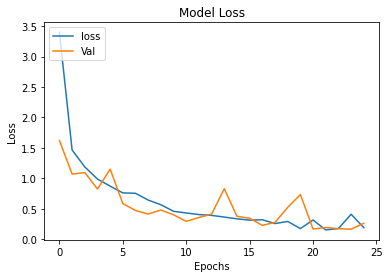

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

<b> Thank you </b>